# MIS - Ryberg Atom Arrays

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from math import *
from IPython import display

1) ##### 3 in a line

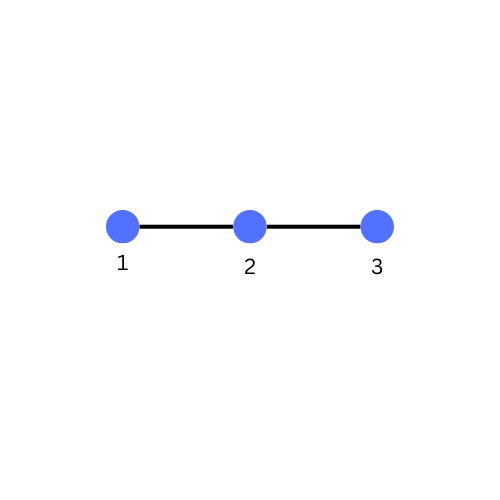

In [147]:
display.Image('./1.png', width = 300)

In [94]:
#3 in a line

#Rb = 9 micrometers
Om = 2*np.pi*2 #MHz

#Edges = 5.74 micrometers
Vij = 2*np.pi*24 #MHz

#initialize each in GS |ggg>
psi = qutip.tensor(basis(2,0), basis(2,0), basis(2,0)).unit()

#possible final states
psi_ggg = qutip.tensor(basis(2,0), basis(2,0), basis(2,0)).unit()
psi_ggr = qutip.tensor(basis(2,0), basis(2,0), basis(2,1)).unit()
psi_grg = qutip.tensor(basis(2,0), basis(2,1), basis(2,0)).unit()
psi_grr = qutip.tensor(basis(2,0), basis(2,1), basis(2,1)).unit()
psi_rgg = qutip.tensor(basis(2,1), basis(2,0), basis(2,0)).unit()
psi_rgr = qutip.tensor(basis(2,1), basis(2,0), basis(2,1)).unit()
psi_rrg = qutip.tensor(basis(2,1), basis(2,1), basis(2,0)).unit()
psi_rrr = qutip.tensor(basis(2,1), basis(2,1), basis(2,1)).unit()

#Detuning term
H0 = 1*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))

#Rabi term
H1 = Om*(qutip.tensor(sigmax(),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),sigmax(),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),sigmax()))

#Interation term
H2 = Vij*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2)) + 
          qutip.tensor(qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1))))

#Sweep
detuning_list = np.linspace(-2*np.pi*10, 2*np.pi*10, 100)

#Store state expectations throughout sweep
p_ggg = np.zeros(100)
p_ggr = np.zeros(100)
p_grg = np.zeros(100)
p_grr = np.zeros(100)
p_rgg = np.zeros(100)
p_rgr = np.zeros(100)
p_rrg = np.zeros(100)
p_rrr = np.zeros(100)

#Perform sweep 
i = 0
for d in detuning_list: 
    times = np.linspace(0, 0.1/100, 100)

    H0 = d*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))
    
    Hamil = H0+H1+H2
    
    result=sesolve(Hamil,psi,times)
    psi = -result.states[-1]

    p_ggg[i] = expect(ket2dm(psi), psi_ggg)
    p_ggr[i] = expect(ket2dm(psi), psi_ggr)
    p_grg[i] = expect(ket2dm(psi), psi_grg)
    p_grr[i] = expect(ket2dm(psi), psi_grr)
    p_rgg[i] = expect(ket2dm(psi), psi_rgg)
    p_rgr[i] = expect(ket2dm(psi), psi_rgr)
    p_rrg[i] = expect(ket2dm(psi), psi_rrg)
    p_rrr[i] = expect(ket2dm(psi), psi_rrr)

    i+=1    

Rounded Final State
[[-0.5+0.j ]
 [ 0. -0.j ]
 [ 0. -0.5j]
 [ 0. +0.j ]
 [ 0. -0.j ]
 [-1. +0.j ]
 [ 0. +0.j ]
 [ 0. -0.j ]]




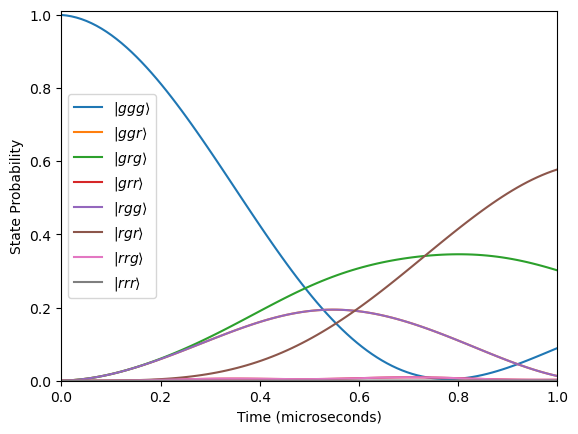

In [95]:
print("Rounded Final State")
print(np.round(2*psi)/2)
print("\n")

t = np.linspace(0, 0.1, 100)
 
#Plot
plt.plot(t*10, p_ggg, label=r'$|ggg\rangle$')
plt.plot(t*10, p_ggr, label=r'$|ggr\rangle$')
plt.plot(t*10, p_grg, label=r'$|grg\rangle$')
plt.plot(t*10, p_grr, label=r'$|grr\rangle$')
plt.plot(t*10, p_rgg, label=r'$|rgg\rangle$')
plt.plot(t*10, p_rgr, label=r'$|rgr\rangle$')
plt.plot(t*10, p_rrg, label=r'$|rrg\rangle$')
plt.plot(t*10, p_rrr, label=r'$|rrr\rangle$')
plt.ylim([0,1.01])
plt.xlim([0,1])
plt.legend()
plt.ylabel('State Probability')
plt.xlabel('Time (microseconds)')
plt.show()

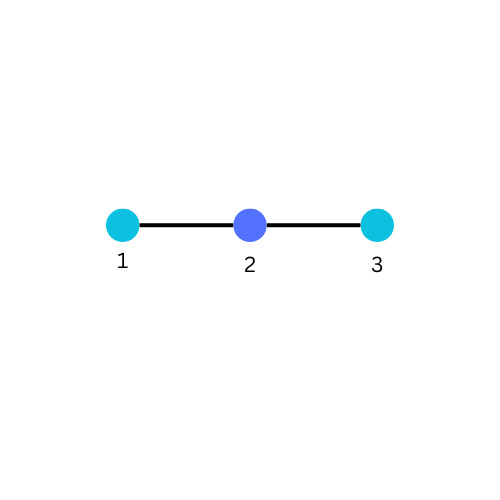

In [150]:
display.Image('./2.png', width = 300)

##### 2. Square Graph

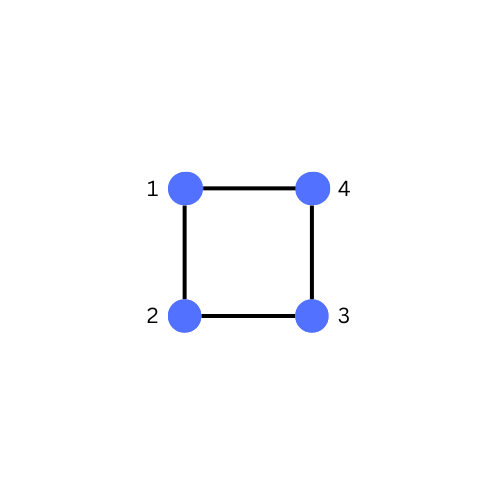

In [151]:
display.Image('./3.png', width = 300)

In [96]:
#square graph

#Rb = 9 micrometers
Om = 2*np.pi*2 #MHz

#Edges = 5.74 micrometers
Vij = 2*np.pi*24 #MHz

#initialize each in GS |gggg>
psi = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0)).unit()

#Chose 8 of 16 possible final states
psi_gggg = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0)).unit()
psi_grgr = qutip.tensor(basis(2,0), basis(2,1), basis(2,0), basis(2,1)).unit()
psi_grrg = qutip.tensor(basis(2,0), basis(2,1), basis(2,1), basis(2,0)).unit()
psi_ggrr = qutip.tensor(basis(2,0), basis(2,0), basis(2,1), basis(2,1)).unit()
psi_rgrg = qutip.tensor(basis(2,1), basis(2,0), basis(2,1), basis(2,0)).unit()
psi_rrgg = qutip.tensor(basis(2,0), basis(2,0), basis(2,1), basis(2,1)).unit()
psi_rggr = qutip.tensor(basis(2,1), basis(2,0), basis(2,0), basis(2,1)).unit()
psi_rrrr = qutip.tensor(basis(2,1), basis(2,1), basis(2,1), basis(2,1)).unit()

#Detuning Term
H0 = 1*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))

#Rabi Term
H1 = Om*(qutip.tensor(sigmax(),qeye(2),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),sigmax(),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),sigmax(),qeye(2))+
        qutip.tensor(qeye(2),qeye(2),qeye(2),sigmax()))

#Interaction Term
H2 = Vij*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2), qeye(2)) + 
          qutip.tensor(qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2)) +
          qutip.tensor(qeye(2), qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1))) +
          qutip.tensor(ket2dm(basis(2,1)), qeye(2), qeye(2), ket2dm(basis(2,1))))

#Sweep
detuning_list = np.linspace(-2*np.pi*10, 2*np.pi*10, 100)

#Store state expectations throughout sweep 
p_gggg = np.zeros(100)
p_grgr = np.zeros(100)
p_grrg = np.zeros(100)
p_ggrr = np.zeros(100)
p_rgrg = np.zeros(100)
p_rrgg = np.zeros(100)
p_rggr = np.zeros(100)
p_rrrr = np.zeros(100)

#Perform sweep
i = 0
for d in detuning_list: 
    times = np.linspace(0, 0.1/100, 100)

    H0 = d*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))
    
    Hamil = H0+H1+H2
    
    result=sesolve(Hamil,psi,times)
    psi = result.states[-1]
    
    p_gggg[i] = expect(ket2dm(psi), psi_gggg)
    p_grgr[i] = expect(ket2dm(psi), psi_grgr)
    p_grrg[i] = expect(ket2dm(psi), psi_grrg)
    p_ggrr[i] = expect(ket2dm(psi), psi_ggrr)
    p_rgrg[i] = expect(ket2dm(psi), psi_rgrg)
    p_rrgg[i] = expect(ket2dm(psi), psi_rrgg)
    p_rggr[i] = expect(ket2dm(psi), psi_rggr)
    p_rrrr[i] = expect(ket2dm(psi), psi_rrrr)

    i+=1 

Rounded Final State
[[-0.5+0.j]
 [-0. +0.j]
 [-0. +0.j]
 [ 0. +0.j]
 [-0. +0.j]
 [-0.5+0.j]
 [ 0. +0.j]
 [ 0. +0.j]
 [-0. +0.j]
 [ 0. +0.j]
 [-0.5+0.j]
 [ 0. +0.j]
 [ 0. +0.j]
 [ 0. +0.j]
 [ 0. +0.j]
 [-0. +0.j]]




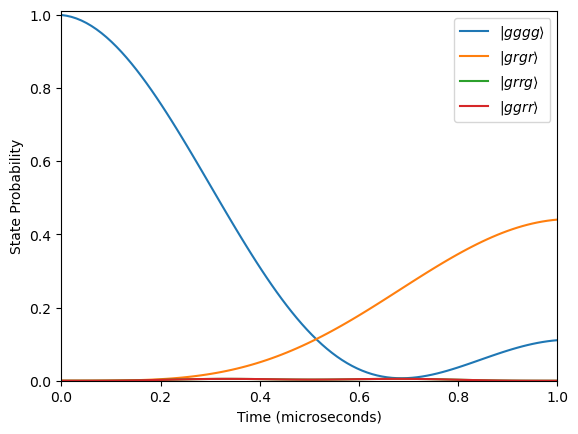

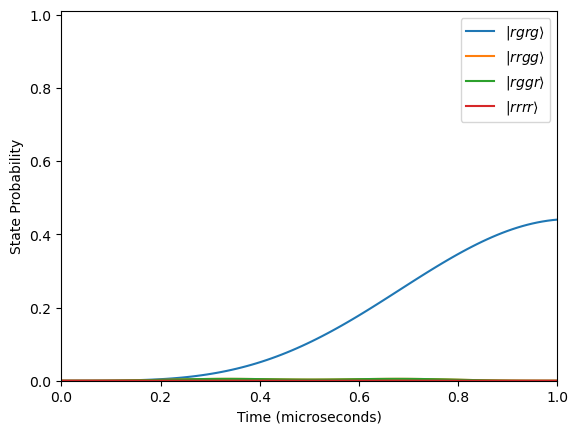

In [97]:
print("Rounded Final State")
print(np.round(2*psi)/2)
print("\n")

#Plot
plt.plot(t*10, p_gggg, label=r'$|gggg\rangle$')
plt.plot(t*10, p_grgr, label=r'$|grgr\rangle$')
plt.plot(t*10, p_grrg, label=r'$|grrg\rangle$')
plt.plot(t*10, p_ggrr, label=r'$|ggrr\rangle$')
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()
plt.ylabel('State Probability')
plt.xlabel('Time (microseconds)')
plt.show()

plt.plot(t*10, p_rgrg, label=r'$|rgrg\rangle$')
plt.plot(t*10, p_rrgg, label=r'$|rrgg\rangle$')
plt.plot(t*10, p_rggr, label=r'$|rggr\rangle$')
plt.plot(t*10, p_rrrr, label=r'$|rrrr\rangle$')
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()
plt.ylabel('State Probability')
plt.xlabel('Time (microseconds)')
plt.show()

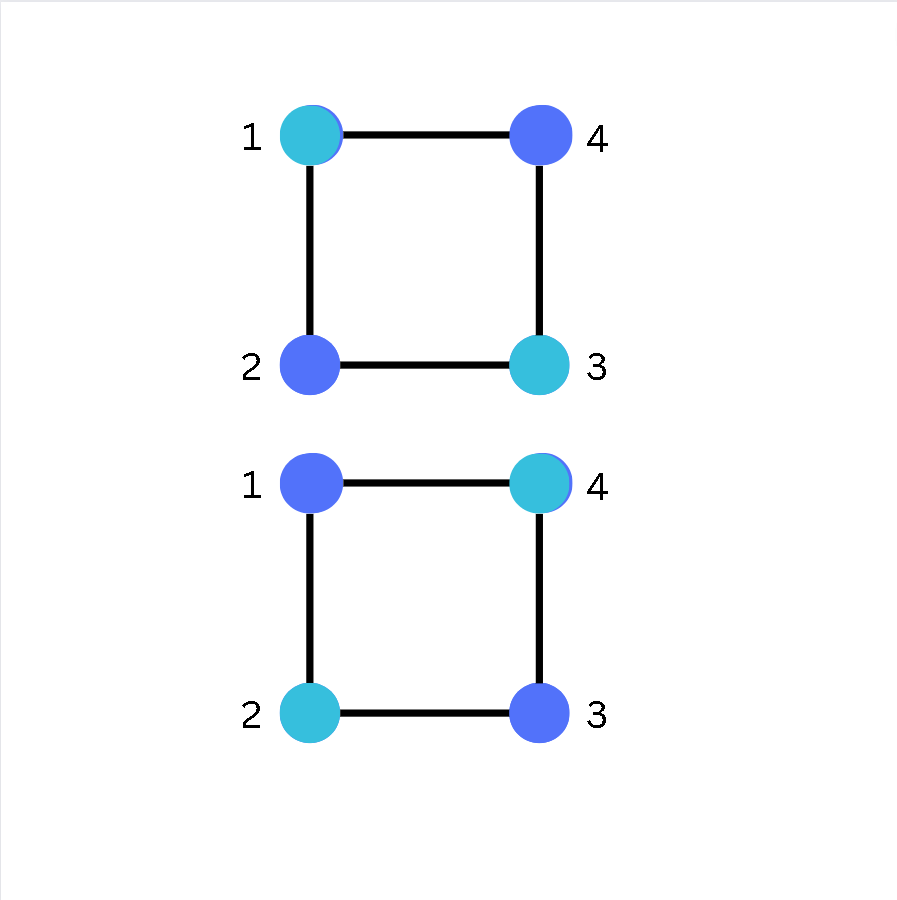

In [154]:
display.Image('./4.png', width = 300)

##### 3. Hexagon RIng 

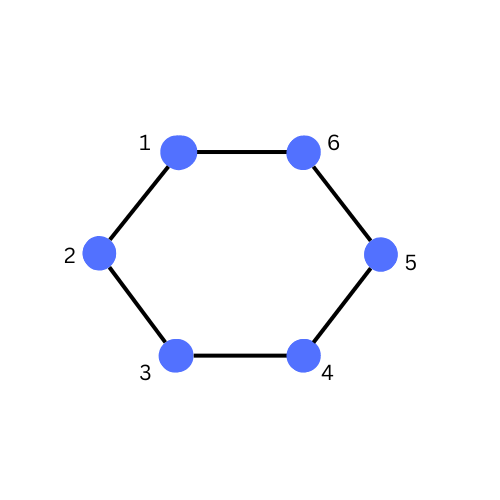

In [167]:
display.Image('./5.png', width = 300)

In [98]:
#6 member ring

#Rb = 9 micrometers
Om = 2*np.pi*2 #MHz

#Edges = 5.74 micrometers
Vij = 2*np.pi*24 #MHz

#initialize each in GS |gggggg>
psi = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0)).unit()

#Chose 8 out of 2^6 possible final states
psi_gggggg = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0)).unit()
psi_gggrrr = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,1), basis(2,1), basis(2,1)).unit()
psi_grgrgr = qutip.tensor(basis(2,0), basis(2,1), basis(2,0), basis(2,1), basis(2,0), basis(2,1)).unit()
psi_grrgrr = qutip.tensor(basis(2,0), basis(2,1), basis(2,1), basis(2,0), basis(2,1), basis(2,1)).unit()
psi_rrrggg = qutip.tensor(basis(2,1), basis(2,1), basis(2,1), basis(2,0), basis(2,0), basis(2,0)).unit()
psi_rgrgrg = qutip.tensor(basis(2,1), basis(2,0), basis(2,1), basis(2,0), basis(2,1), basis(2,0)).unit()
psi_rggrgg = qutip.tensor(basis(2,1), basis(2,0), basis(2,0), basis(2,1), basis(2,0), basis(2,0)).unit()
psi_rrrrrr = qutip.tensor(basis(2,1), basis(2,1), basis(2,1), basis(2,1), basis(2,1), basis(2,1)).unit()

#Detuning Term
H0 = 1*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1)), 
                     ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))

#Rabi Term
H1 = Om*(qutip.tensor(sigmax(),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),sigmax(),qeye(2),qeye(2),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),sigmax(),qeye(2),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),qeye(2),sigmax(),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),qeye(2),qeye(2),sigmax(),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),sigmax()))

#Interaction Term
H2 = Vij*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2), qeye(2), qeye(2), qeye(2)) + 
          qutip.tensor(qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2), qeye(2), qeye(2)) +
          qutip.tensor(qeye(2), qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2), qeye(2)) +
          qutip.tensor(qeye(2), qeye(2), qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2)) +
          qutip.tensor(qeye(2), qeye(2), qeye(2), qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1))) +
          qutip.tensor(ket2dm(basis(2,1)), qeye(2), qeye(2), qeye(2), qeye(2), ket2dm(basis(2,1))))

#Sweep 
detuning_list = np.linspace(-2*np.pi*10, 2*np.pi*10, 100)

#Store state expectations throughout sweep 
p_gggggg = np.zeros(100)
p_gggrrr = np.zeros(100)
p_grgrgr = np.zeros(100)
p_grrgrr = np.zeros(100)
p_rrrggg = np.zeros(100)
p_rgrgrg = np.zeros(100)
p_rggrgg = np.zeros(100)
p_rrrrrr = np.zeros(100)

#Perform sweep 
i = 0
for d in detuning_list: 
    times = np.linspace(0, 0.1/100, 100)

    H0 = d*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1)), 
                     ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))
    
    Hamil = H0+H1+H2
    
    result=sesolve(Hamil,psi,times)
    psi = result.states[-1]
    
    p_gggggg[i] = expect(ket2dm(psi), psi_gggggg)
    p_gggrrr[i] = expect(ket2dm(psi), psi_gggrrr)
    p_grgrgr[i] = expect(ket2dm(psi), psi_grgrgr)
    p_grrgrr[i] = expect(ket2dm(psi), psi_grrgrr)
    p_rrrggg[i] = expect(ket2dm(psi), psi_rrrggg)
    p_rgrgrg[i] = expect(ket2dm(psi), psi_rgrgrg)
    p_rggrgg[i] = expect(ket2dm(psi), psi_rggrgg)
    p_rrrrrr[i] = expect(ket2dm(psi), psi_rrrrrr)

    i+=1 

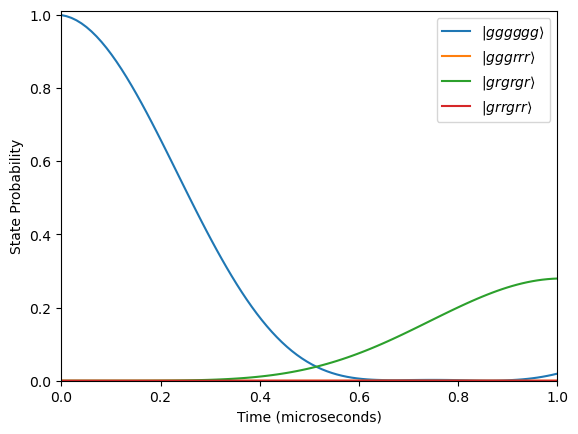

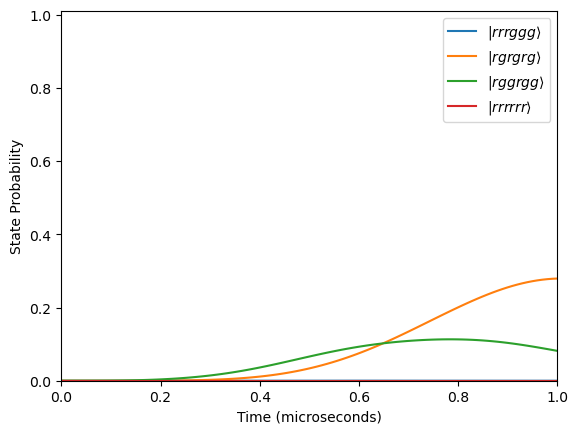

In [99]:
#Plot
plt.plot(t*10, p_gggggg, label=r'$|gggggg\rangle$')
plt.plot(t*10, p_gggrrr, label=r'$|gggrrr\rangle$')
plt.plot(t*10, p_grgrgr, label=r'$|grgrgr\rangle$')
plt.plot(t*10, p_grrgrr, label=r'$|grrgrr\rangle$')
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()
plt.ylabel('State Probability')
plt.xlabel('Time (microseconds)')
plt.show()

plt.plot(t*10, p_rrrggg, label=r'$|rrrggg\rangle$')
plt.plot(t*10, p_rgrgrg, label=r'$|rgrgrg\rangle$')
plt.plot(t*10, p_rggrgg, label=r'$|rggrgg\rangle$')
plt.plot(t*10, p_rrrrrr, label=r'$|rrrrrr\rangle$')
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()
plt.ylabel('State Probability')
plt.xlabel('Time (microseconds)')
plt.show()

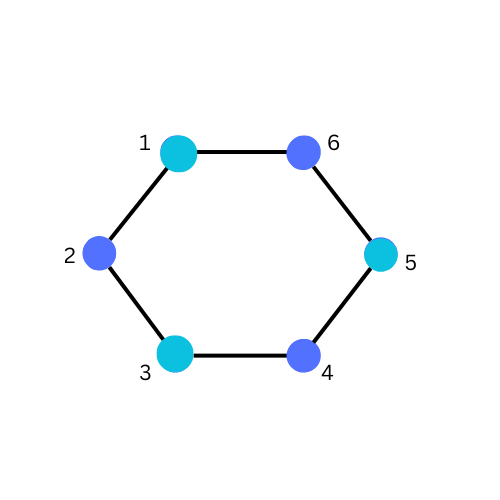

In [158]:
display.Image('./6.png', width = 300)

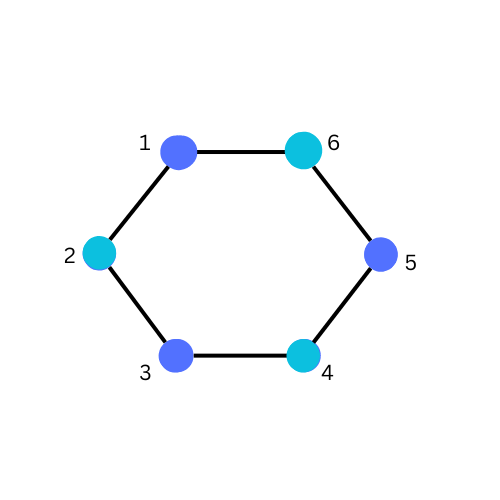

In [159]:
display.Image('./7.png', width = 300)

##### 4. Hexagon Ring with  Vertex 1 and 3 connected

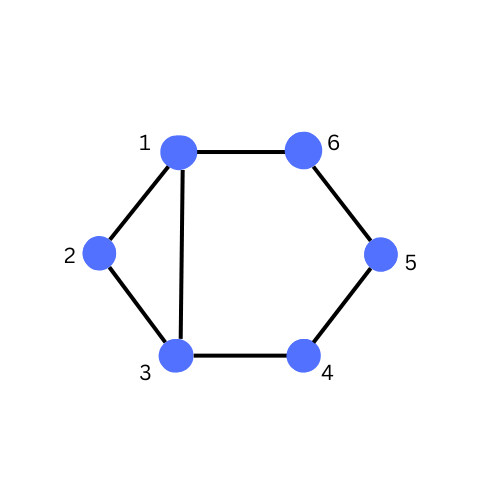

In [160]:
display.Image('./8.png', width = 300)

In [100]:
#6 member ring, atom 1 connected to atom 3

#Rb = 9 micrometers
Om = 2*np.pi*2 #MHz

#Edges = 5.74 micrometers
Vij = 2*np.pi*24 #MHz

#Initialize each in GS |gggggg>
psi = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0)).unit()

#Chose 8 of 2^6 possible states
psi_gggggg = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0), basis(2,0)).unit()
psi_gggrrr = qutip.tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,1), basis(2,1), basis(2,1)).unit()
psi_grgrgr = qutip.tensor(basis(2,0), basis(2,1), basis(2,0), basis(2,1), basis(2,0), basis(2,1)).unit()
psi_grrgrr = qutip.tensor(basis(2,0), basis(2,1), basis(2,1), basis(2,0), basis(2,1), basis(2,1)).unit()
psi_rrrggg = qutip.tensor(basis(2,1), basis(2,1), basis(2,1), basis(2,0), basis(2,0), basis(2,0)).unit()
psi_rgrgrg = qutip.tensor(basis(2,1), basis(2,0), basis(2,1), basis(2,0), basis(2,1), basis(2,0)).unit()
psi_rggrgg = qutip.tensor(basis(2,1), basis(2,0), basis(2,0), basis(2,1), basis(2,0), basis(2,0)).unit()
psi_rrrrrr = qutip.tensor(basis(2,1), basis(2,1), basis(2,1), basis(2,1), basis(2,1), basis(2,1)).unit()

#Detuning Term
H0 = 1*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1)), 
                     ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))

#Rabi Term
H1 = Om*(qutip.tensor(sigmax(),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),sigmax(),qeye(2),qeye(2),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),sigmax(),qeye(2),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),qeye(2),sigmax(),qeye(2),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),qeye(2),qeye(2),sigmax(),qeye(2))+
         qutip.tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),sigmax()))
 
#Interaction Term
H2 = Vij*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2), qeye(2), qeye(2), qeye(2)) + 
          qutip.tensor(qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2), qeye(2), qeye(2)) +
          qutip.tensor(qeye(2), qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2), qeye(2)) +
          qutip.tensor(qeye(2), qeye(2), qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1)), qeye(2)) +
          qutip.tensor(qeye(2), qeye(2), qeye(2), qeye(2), ket2dm(basis(2,1)), ket2dm(basis(2,1))) +
          qutip.tensor(ket2dm(basis(2,1)), qeye(2), qeye(2), qeye(2), qeye(2), ket2dm(basis(2,1))) + 
          qutip.tensor(ket2dm(basis(2,1)), qeye(2), ket2dm(basis(2,1)), qeye(2), qeye(2), qeye(2)))

#Sweep
detuning_list = np.linspace(-2*np.pi*10, 2*np.pi*10, 100)

#Store state expectations throughout sweep
p_gggggg = np.zeros(100)
p_gggrrr = np.zeros(100)
p_grgrgr = np.zeros(100)
p_grrgrr = np.zeros(100)
p_rrrggg = np.zeros(100)
p_rgrgrg = np.zeros(100)
p_rggrgg = np.zeros(100)
p_rrrrrr = np.zeros(100)

#Perform Sweep 
i = 0
for d in detuning_list: 
    times = np.linspace(0, 0.1/100, 100)

    H0 = d*(qutip.tensor(ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1)), 
                     ket2dm(basis(2,1)), ket2dm(basis(2,1)), ket2dm(basis(2,1))))
    
    Hamil = H0+H1+H2
    
    result=sesolve(Hamil,psi,times)
    psi = result.states[-1]
    
    p_gggggg[i] = expect(ket2dm(psi), psi_gggggg)
    p_gggrrr[i] = expect(ket2dm(psi), psi_gggrrr)
    p_grgrgr[i] = expect(ket2dm(psi), psi_grgrgr)
    p_grrgrr[i] = expect(ket2dm(psi), psi_grrgrr)
    p_rrrggg[i] = expect(ket2dm(psi), psi_rrrggg)
    p_rgrgrg[i] = expect(ket2dm(psi), psi_rgrgrg)
    p_rggrgg[i] = expect(ket2dm(psi), psi_rggrgg)
    p_rrrrrr[i] = expect(ket2dm(psi), psi_rrrrrr)

    i+=1 

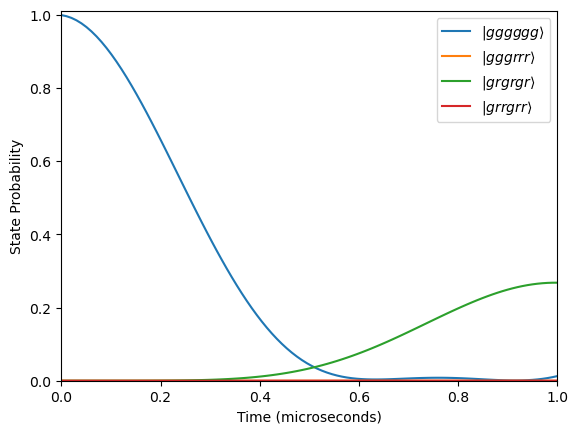

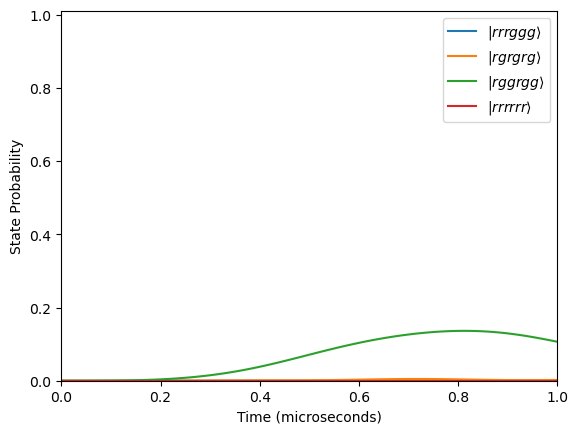

In [101]:
#Plot
plt.plot(t*10, p_gggggg, label=r'$|gggggg\rangle$')
plt.plot(t*10, p_gggrrr, label=r'$|gggrrr\rangle$')
plt.plot(t*10, p_grgrgr, label=r'$|grgrgr\rangle$')
plt.plot(t*10, p_grrgrr, label=r'$|grrgrr\rangle$')
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()
plt.ylabel('State Probability')
plt.xlabel('Time (microseconds)')
plt.show()

plt.plot(t*10, p_rrrggg, label=r'$|rrrggg\rangle$')
plt.plot(t*10, p_rgrgrg, label=r'$|rgrgrg\rangle$')
plt.plot(t*10, p_rggrgg, label=r'$|rggrgg\rangle$')
plt.plot(t*10, p_rrrrrr, label=r'$|rrrrrr\rangle$')
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()
plt.ylabel('State Probability')
plt.xlabel('Time (microseconds)')
plt.show()

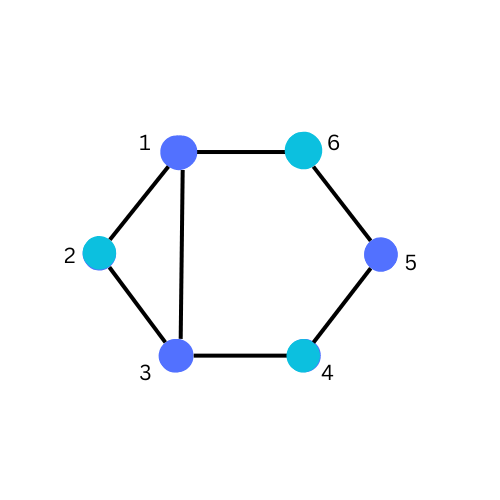

In [140]:
display.Image('./9.png', width = 300)

## Notes

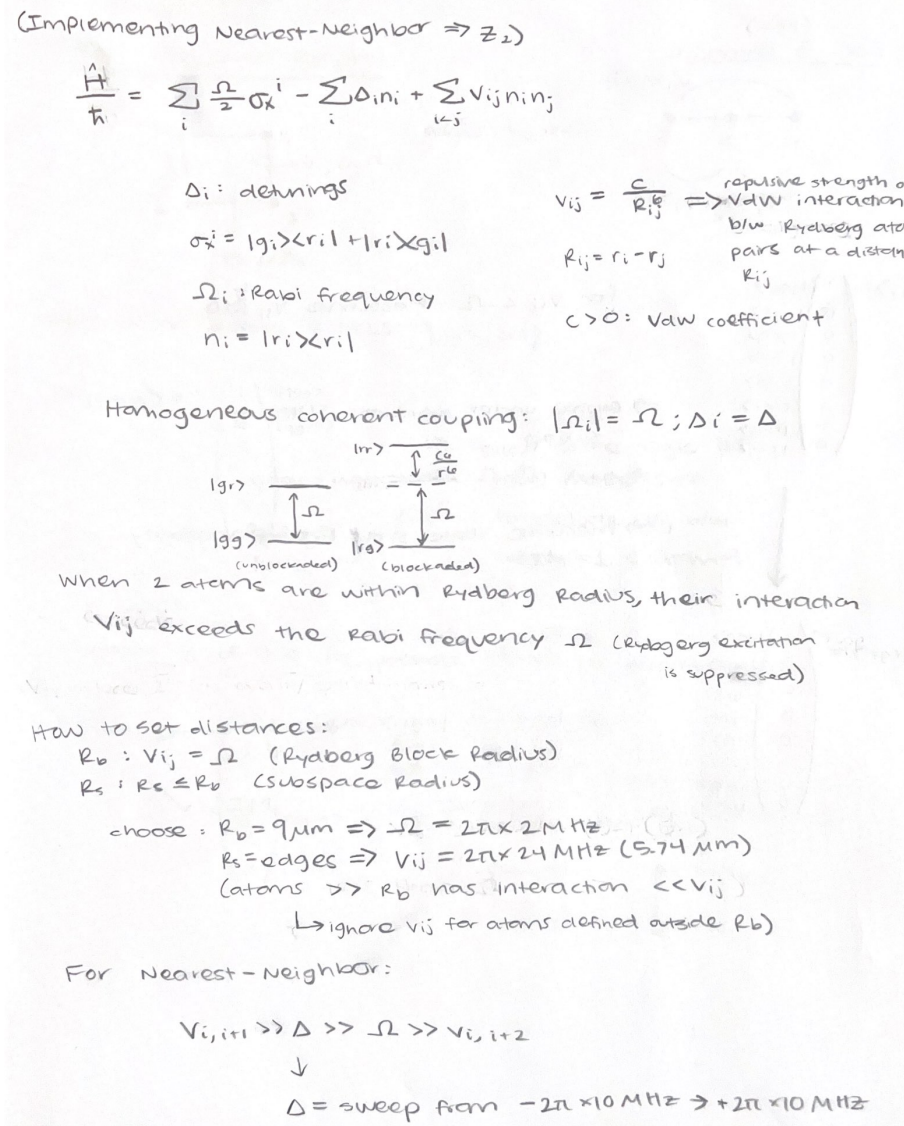

In [141]:
display.Image('./MIS1.png', width = 800)

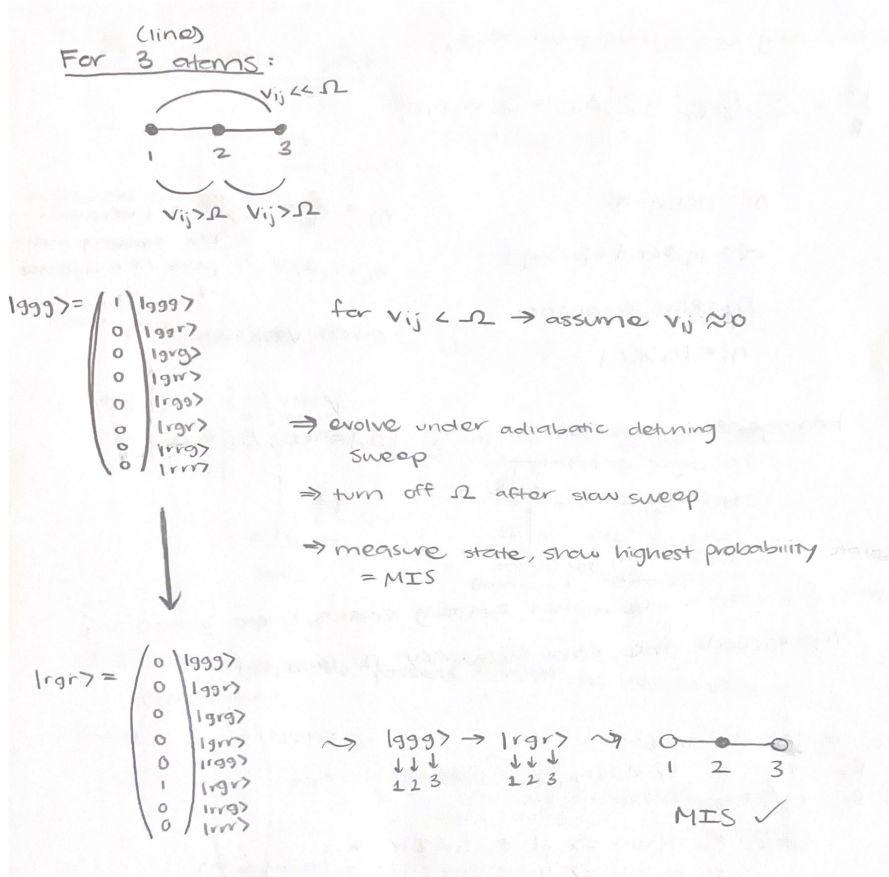

In [142]:
display.Image('./MIS2.png', width = 800)

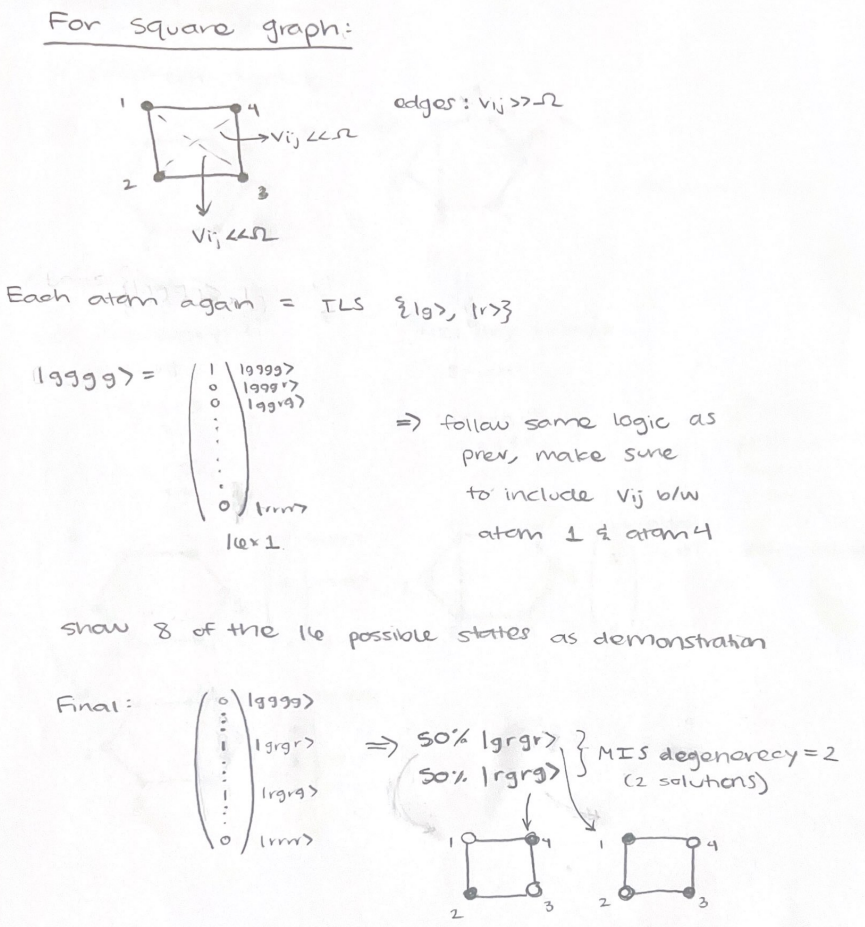

In [143]:
display.Image('./MIS3.png', width = 800)

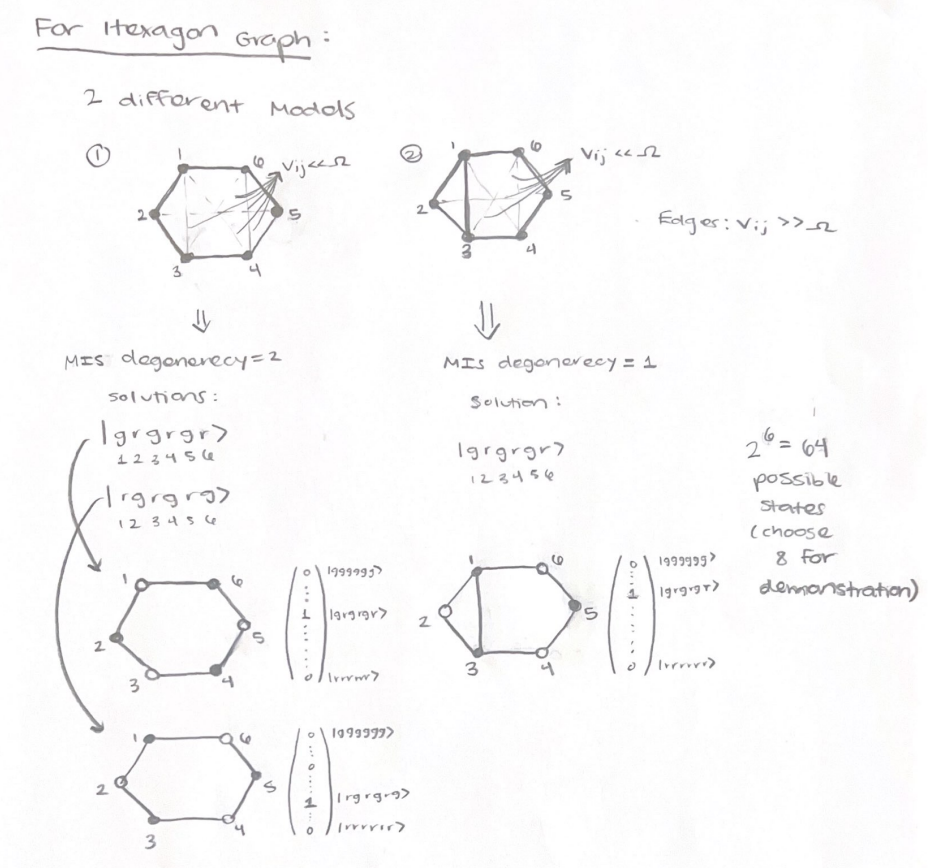

In [114]:
display.Image('./MIS4.png', width = 800)